In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
sns.set_context('paper')
sns.set_style({"grid.linestyle": "--"})
kw = {'linestyle' : "--"}

In [77]:
df = pd.read_csv('../../figs/fig_tabular_data/drift_threshold_results_full_domains_adj.csv')
del df['Year.1']
del df['Field Area.1']
df['Field Area'] = [i.upper() for i in df['Field Area']]
df = df.round(2)
df.head()

,Field Area,Year,Drift Area [% total],Drift Volume [% total],Drift Area [km^2],Drift Volume [m^3],Drift Threshold [% of mean depth],Drift Threshold [m],Mean Depth [m],SD Depth [m],CV Depth,Total Area [km^2],Area Normalized Drift Volume [m^3/km^2]
0,HV,2013,19.20,34.48,3.97,3911711.0,130.0,0.71,0.55,0.30,0.55,20.68,189154.30
1,HV,2015,17.54,26.37,5.00,5321696.0,120.0,0.85,0.71,0.25,0.35,28.54,186464.47
2,HV,2018,20.00,40.71,5.59,5542494.0,140.0,0.68,0.49,0.36,0.73,27.95,198300.32
3,HV,2016,19.40,29.36,5.09,4034082.0,120.0,0.63,0.52,0.21,0.41,26.26,153620.79
4,HV,2017,15.40,30.66,4.29,4555608.0,140.0,0.75,0.53,0.32,0.60,27.84,163635.34


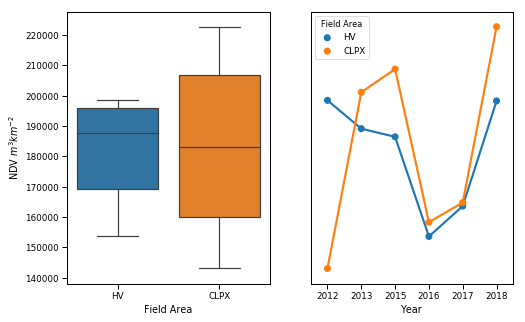

In [78]:
fig = plt.figure(figsize=(8,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, sharey = ax1)

# Tell pointplot to plot on ax1 with the ax argument
sns.catplot(x="Field Area", y="Area Normalized Drift Volume [m^3/km^2]",
            kind="box", data=df, ax=ax1)

# Tell the factorplot to plot on ax2 with the ax argument
# Also store the FacetGrid in 'g'
sns.catplot(x="Year", y="Area Normalized Drift Volume [m^3/km^2]",
                hue="Field Area", kind="point", data=df, ax=ax2, kwargs=kw)

ax1.set_ylabel('NDV $m^3$$km^{-2}$')

ax2.yaxis.set_visible(False)

# Close the FacetGrid figure which we don't need (g.fig)
plt.close()
plt.close()
plt.savefig('../../figs/pngs/f6_drift_census_ndv_box_and_line.png',
            dpi=300, bbox_inches='tight')

In [79]:
df.to_csv('../../figs/fig_tabular_data/drift_threshold_results_table_clean.csv', index=False)
